# Requirements

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
The analysis of Spotify songs, characterized by a rich set of features such as danceability, energy, and valence, holds significant importance in the realm of music research, entertainment, and data-driven decision-making. Understanding the musical attributes of songs through data analysis provides valuable insights into user preferences, genre trends, and the overall landscape of the music industry. This type of analysis contributes to personalized recommendations for users, enhancing their music discovery experience. Moreover, it aids music producers and artists in tailoring their creations to align with popular trends and audience preferences. Additionally, the exploration of Spotify song data has the potential to uncover patterns, correlations, and anomalies that can inform marketing strategies, playlist curation, and even influence the strategic planning of music events. Overall, the analysis of Spotify songs is instrumental in leveraging data to enhance user experiences, guide artistic endeavors, and inform strategic decisions within the dynamic and ever-evolving music industry.

## The Spotify Songs Dataset

## Downloading the Spotify Songs Dataset

In [5]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_ # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 150MB/s]


## Exploring the Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [6]:
# Write your code here. Add as many boxes as you need.

In [7]:
df=pd.read_csv("/content/spotify-songs.csv")

In [8]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


Encode the target variable using the `LabelEncoder` from the `scikit-learn` library.

In [9]:
# Write your code here. Add as many boxes as you need.

In [10]:
#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df_copy=df.copy()

In [13]:
df['genre']=le.fit_transform(df['genre'])

In [14]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


Explore the dataset using visualizations of your choice.

In [15]:
# Write your code here. Add as many boxes as you need.

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

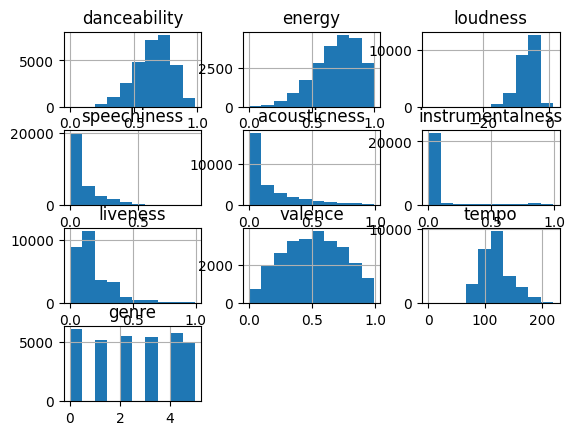

In [16]:
df.hist()

Check if the dataset is balanced.

In [17]:
# Write your code here. Add as many boxes as you need.

<Axes: >

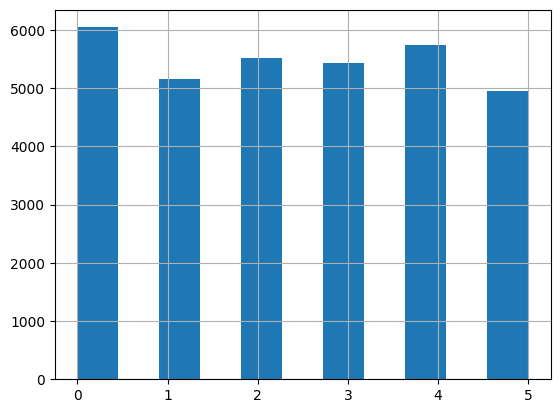

In [18]:
df['genre'].hist(bins=11)

In [19]:
df['genre'].value_counts()

0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: genre, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [20]:
# Write your code here. Add as many boxes as you need.

In [21]:
df.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [22]:
df_copy.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [23]:
missing_values=df.isnull().sum()
procentage=missing_values/len(df)*100
missing_values_table=pd.concat([missing_values,procentage],axis=1)
missing_values_table.columns=['number of missing values','procentage of missing values']
missing_values_table

,number of missing values,procentage of missing values
danceability,3662,11.153413
energy,11261,34.297810
loudness,7620,23.208357
speechiness,2361,7.190936
acousticness,894,2.722870
instrumentalness,6470,19.705784
liveness,2986,9.094509
valence,7489,22.809369
tempo,6557,19.970761
genre,0,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [24]:
# Write your code here. Add as many boxes as you need.

<Axes: >

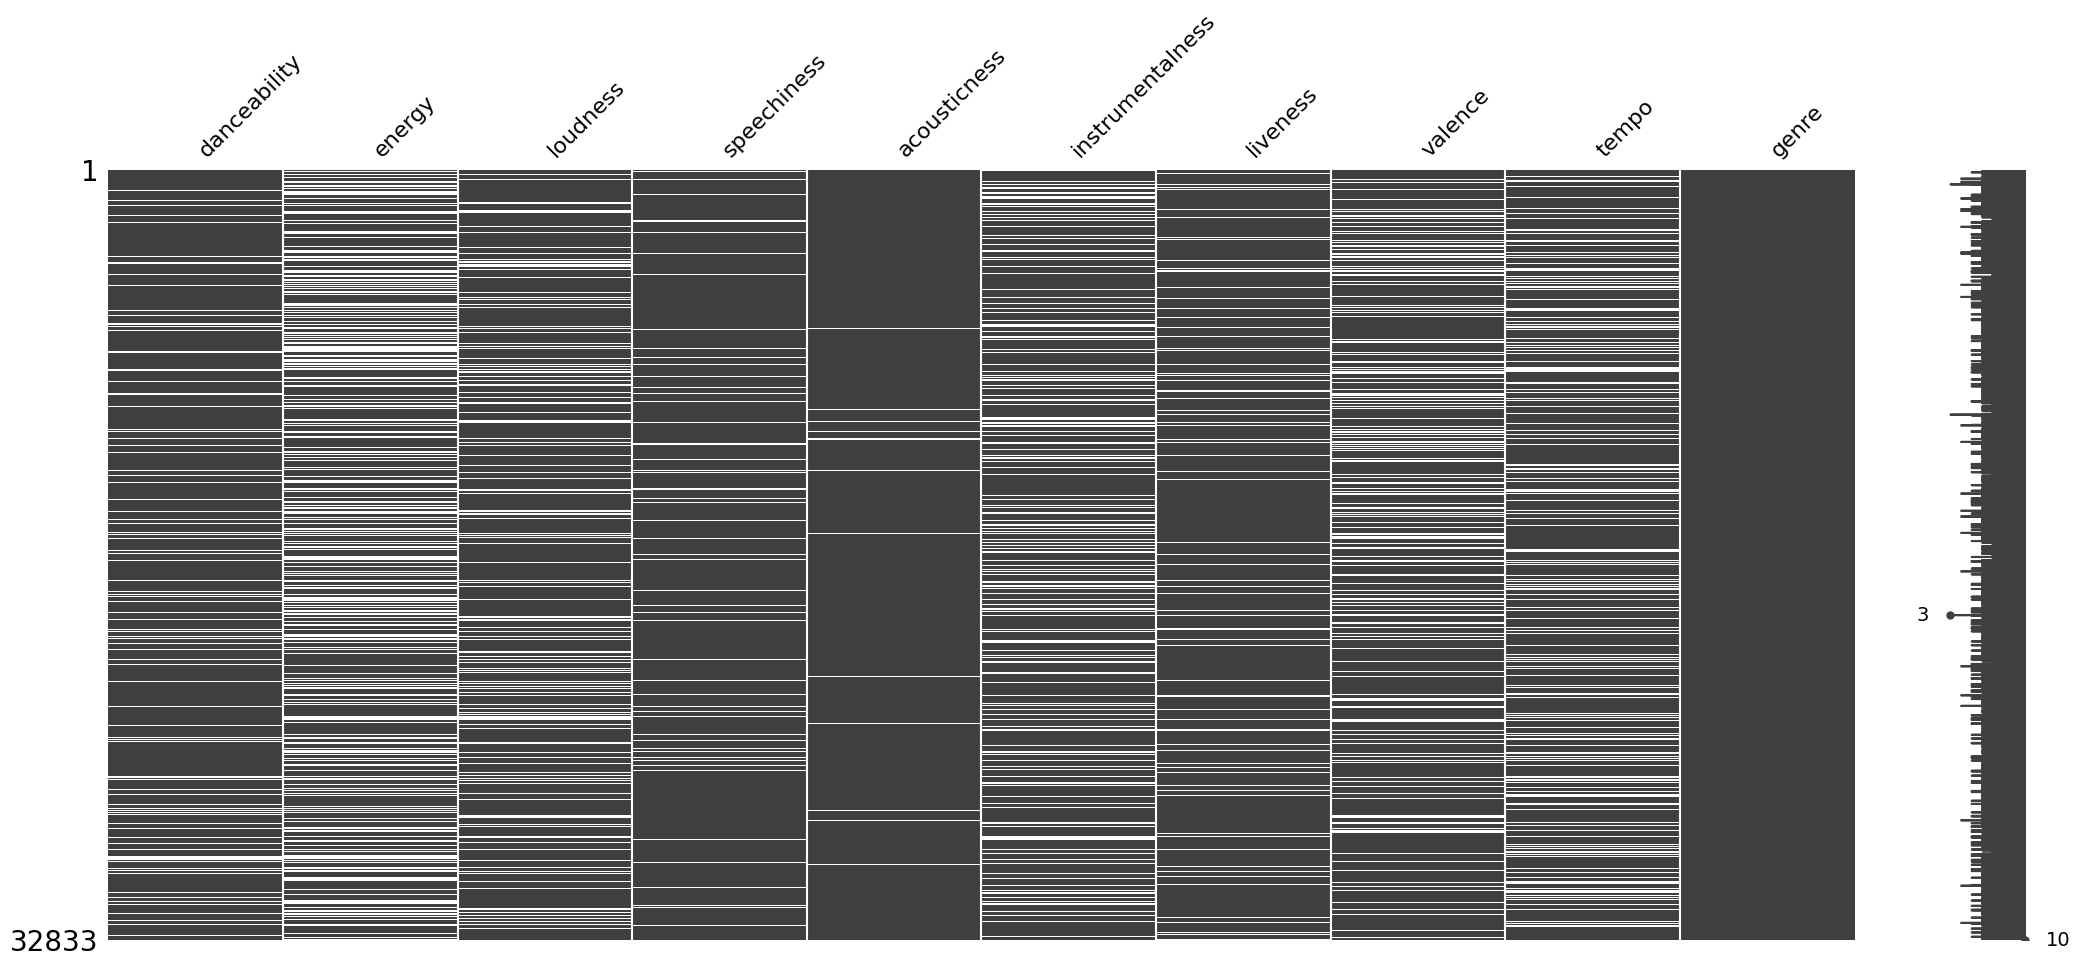

In [25]:
msno.matrix(df)

<Axes: >

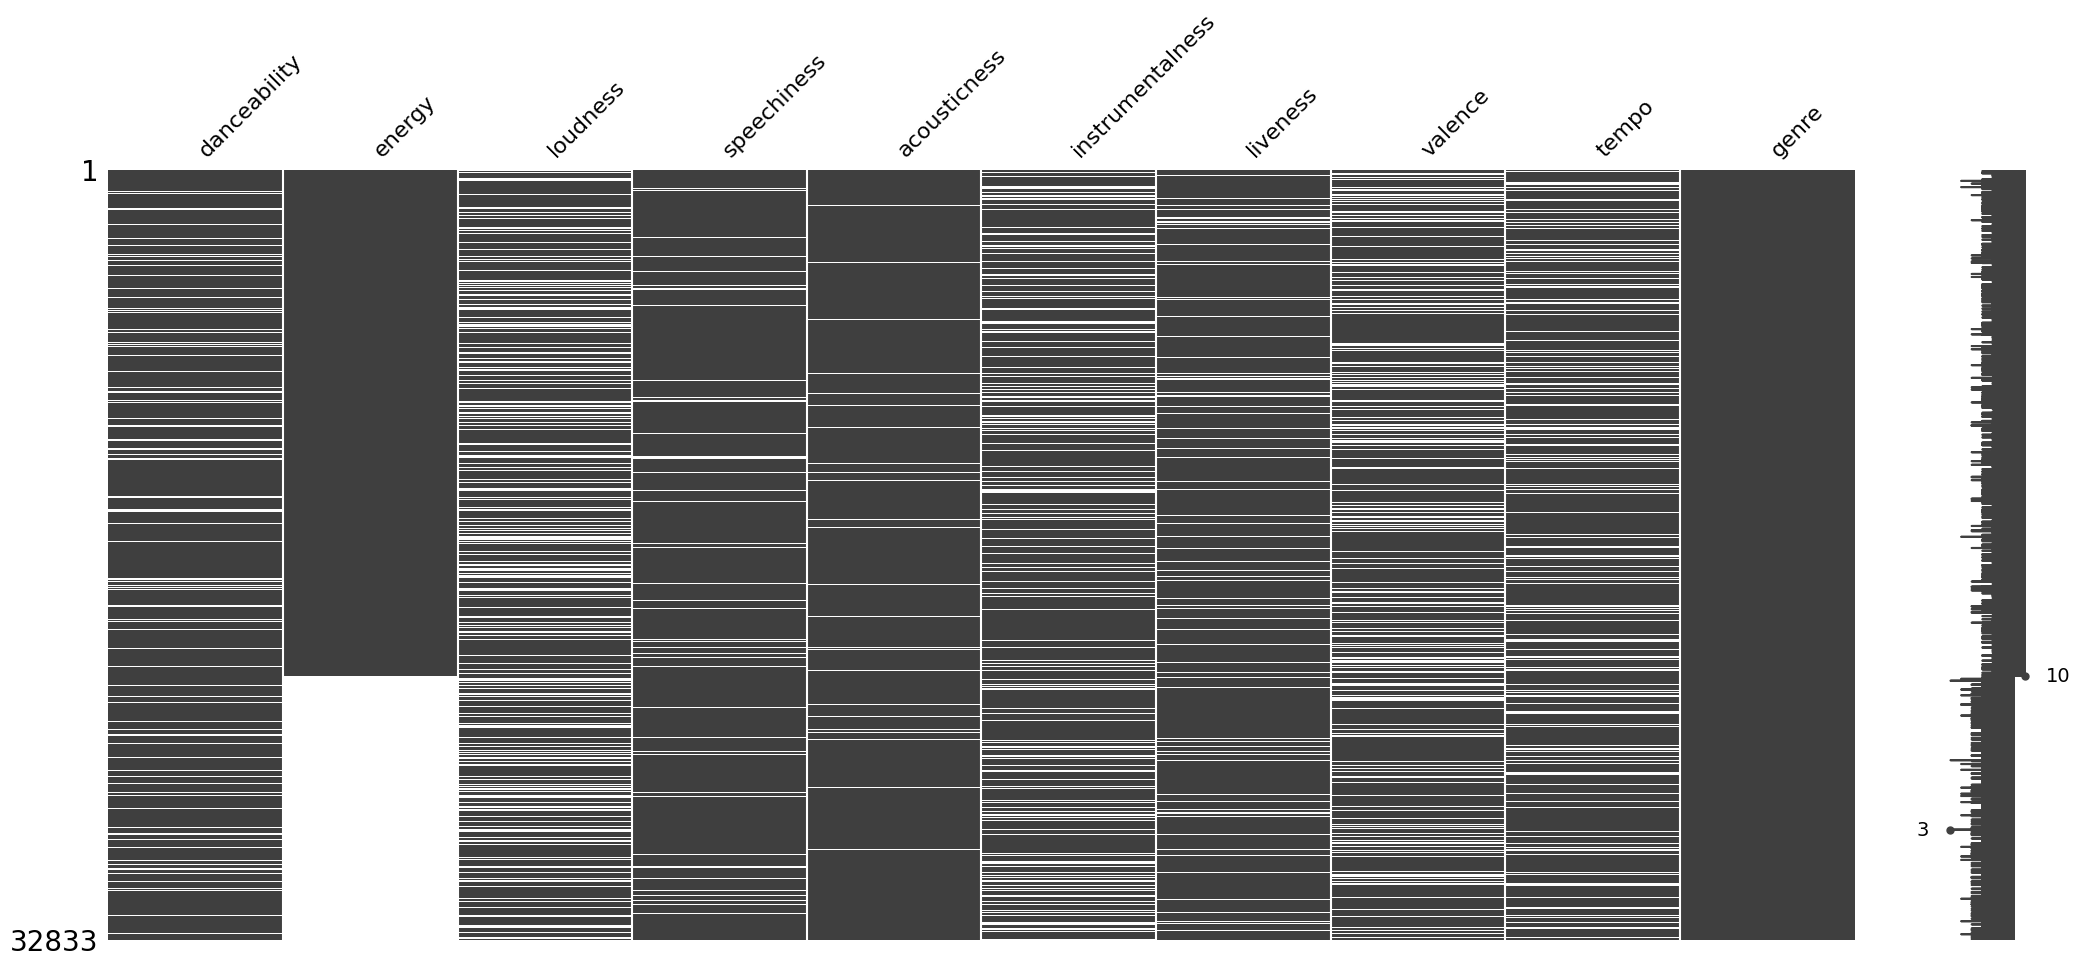

In [26]:
msno.matrix(df.sort_values('energy'))

<Axes: >

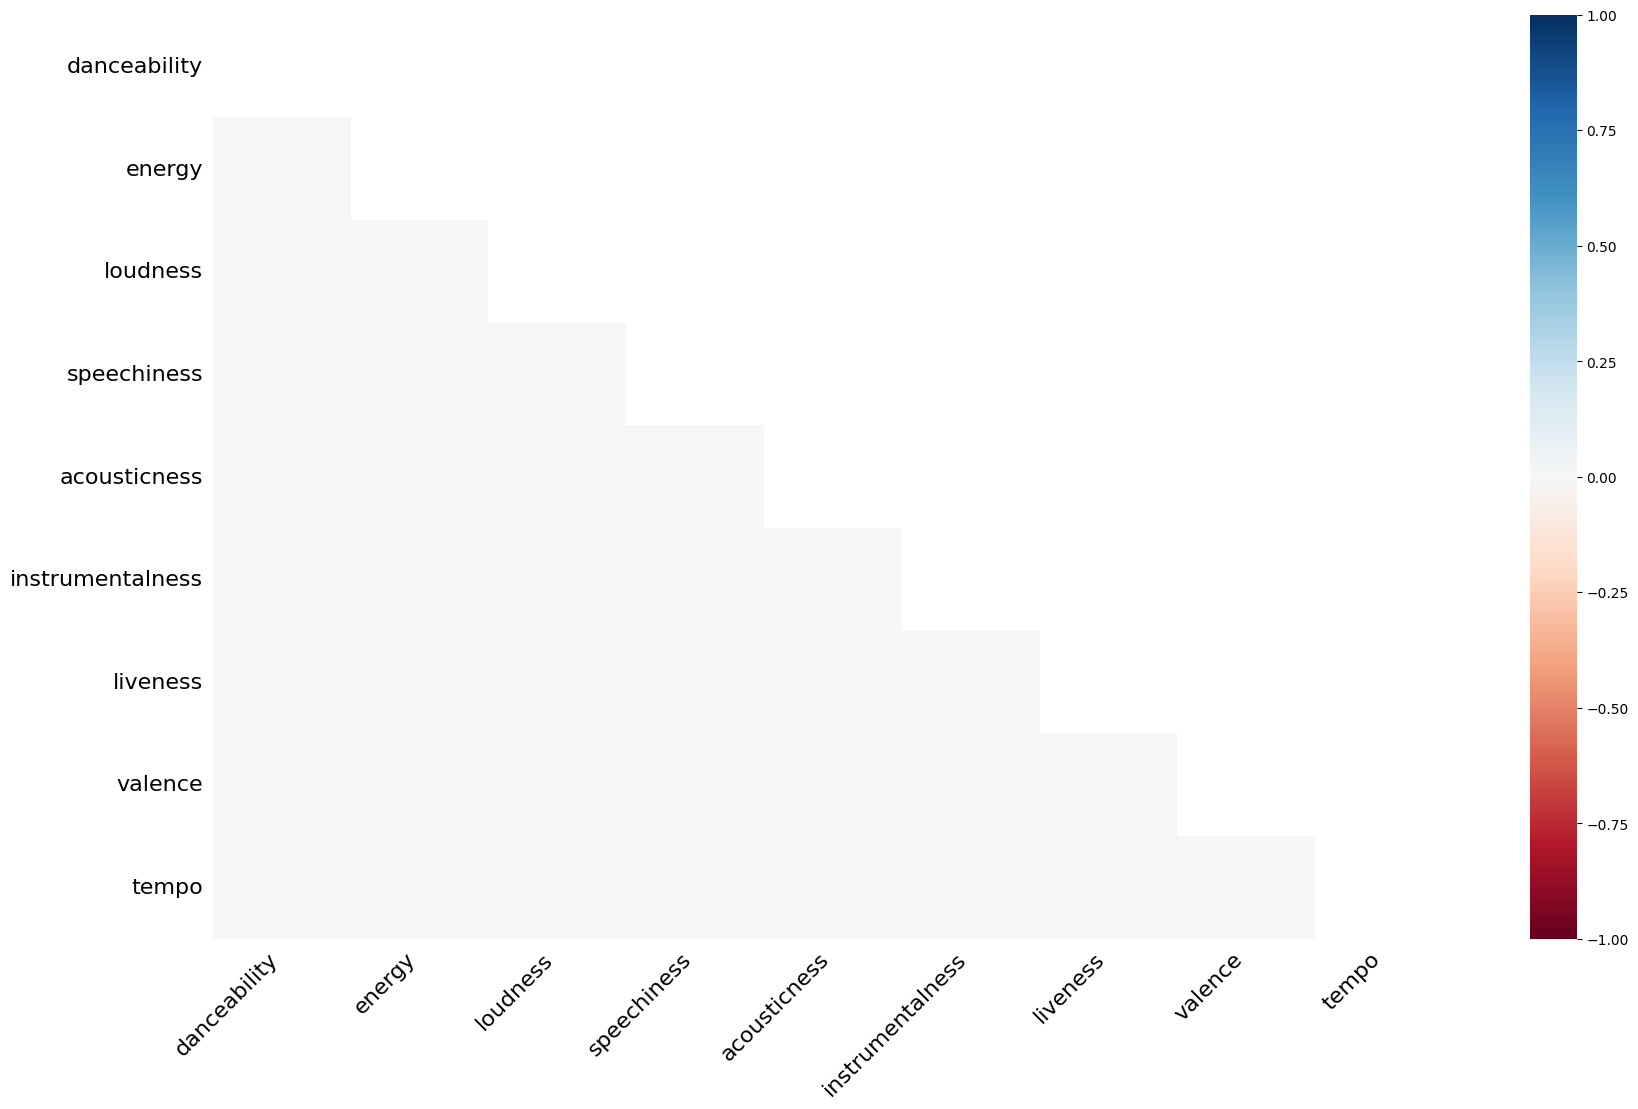

In [27]:
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [28]:
# Write your code here. Add as many boxes as you need.

In [29]:
df.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [30]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


In [31]:
ds=df.copy()

In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='most_frequent')
imputer3=SimpleImputer(strategy='median')
imputer4 = SimpleImputer(strategy = 'constant',  fill_value = 0)
colums1=['danceability','liveness','tempo']
colums2=['loudness','speechiness','acousticness','valence']
colums3=['energy']
colums4=['instrumentalness']

ds[colums1]=imputer.fit_transform(df[colums1])
ds[colums2]=imputer2.fit_transform(df[colums2])
ds[colums3]=imputer3.fit_transform(df[colums3])
ds[colums4]=imputer4.fit_transform(df[colums4])



In [33]:
ds.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [34]:
# Write your code here. Add as many boxes as you need.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
tem=ds.drop(columns=['genre'])
genre=ds['genre']

In [37]:
X_train, X_test, Y_train, Y_test=train_test_split(tem,genre,test_size=0.2)

In [38]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26266, 9) (6567, 9) (26266,) (6567,)


## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [39]:
# Write your code here. Add as many boxes as you need.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
ds


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036000,2
1,0.726,0.721,-4.969,0.0373,0.072400,0.000000,0.3570,0.6930,99.972000,2
2,0.675,0.931,-3.432,0.0742,0.079400,0.000000,0.1100,0.6130,124.008000,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,120.905999,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976000,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.721,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170000,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041000,0
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000000,0.1500,0.4360,127.989000,0
32831,0.626,0.721,-4.973,0.1090,0.007920,0.127000,0.3430,0.3080,128.008000,0


In [42]:
colums=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [43]:
ds_copy=ds.copy(deep=True)

In [44]:
for col in colums:
  ds_copy[col]=scaler.fit_transform(ds[col].to_numpy().reshape(-1, 1) )
#ds_copy[colums]=scaler.fit_transform(ds[colums].to_numpy().reshape(-1, 1) )

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [45]:
# Write your code here. Add as many boxes as you need.

In [46]:
classifaer=KNeighborsClassifier(n_neighbors=5)
classifaer.fit(X_train,Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [47]:
# Write your code here. Add as many boxes as you need.

In [48]:
y_pred=classifaer.predict(X_test)


In [49]:
print(y_pred)

[0 4 1 ... 0 4 1]


Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [50]:
# Write your code here. Add as many boxes as you need.

In [51]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score


In [52]:
confusion_matrix(Y_test,y_pred)

array([[771, 111, 177,  61,  63,  54],
       [175, 370, 175, 139, 120,  48],
       [249, 225, 241, 141,  91,  96],
       [112, 218, 182, 312, 163, 103],
       [174, 209, 165, 218, 331,  79],
       [128, 120, 199, 178,  87, 282]])

In [53]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54      1237
           1       0.30      0.36      0.32      1027
           2       0.21      0.23      0.22      1043
           3       0.30      0.29      0.29      1090
           4       0.39      0.28      0.33      1176
           5       0.43      0.28      0.34       994

    accuracy                           0.35      6567
   macro avg       0.35      0.34      0.34      6567
weighted avg       0.35      0.35      0.35      6567



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [54]:
# Write your code here. Add as many boxes as you need.

In [55]:
X_train, X_test, Y_train, Y_test=train_test_split(tem,genre,test_size=0.1)

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [56]:
# Write your code here. Add as many boxes as you need.

In [57]:
for col in colums:
  ds_copy[col]=scaler.fit_transform(ds[col].to_numpy().reshape(-1, 1) )

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [58]:
# Write your code here. Add as many boxes as you need.

In [59]:
#sklearn.model_selection.GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#GridSearchCV.fit(X_train,Y_train,)

In [62]:
classifaer=KNeighborsClassifier(n_neighbors=10)
classifaer.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
y_pred1=classifaer.predict(X_test)

In [64]:
classifaer=KNeighborsClassifier(n_neighbors=15)
classifaer.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [65]:
y_pred12=classifaer.predict(X_test)

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [66]:
# Write your code here. Add as many boxes as you need.

In [67]:
confusion_matrix(Y_test,y_pred1)

array([[382,  57,  88,  27,  24,  29],
       [ 89, 215,  93,  64,  64,  24],
       [124, 121, 133,  70,  57,  43],
       [ 59, 100,  94, 164,  95,  48],
       [ 48, 106,  58, 100, 178,  46],
       [ 64,  62,  81,  91,  44, 142]])

In [68]:
confusion_matrix(Y_test,y_pred12)

array([[385,  59,  78,  29,  29,  27],
       [ 77, 204, 103,  65,  73,  27],
       [122, 110, 133,  69,  71,  43],
       [ 53,  93,  95, 162, 100,  57],
       [ 38, 103,  60,  96, 188,  51],
       [ 76,  50,  79,  92,  54, 133]])

In [69]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56       607
           1       0.33      0.39      0.36       549
           2       0.24      0.24      0.24       548
           3       0.32      0.29      0.30       560
           4       0.39      0.33      0.36       536
           5       0.43      0.29      0.35       484

    accuracy                           0.37      3284
   macro avg       0.37      0.36      0.36      3284
weighted avg       0.37      0.37      0.36      3284



In [70]:
print(classification_report(Y_test,y_pred12))

              precision    recall  f1-score   support

           0       0.51      0.63      0.57       607
           1       0.33      0.37      0.35       549
           2       0.24      0.24      0.24       548
           3       0.32      0.29      0.30       560
           4       0.37      0.35      0.36       536
           5       0.39      0.27      0.32       484

    accuracy                           0.37      3284
   macro avg       0.36      0.36      0.36      3284
weighted avg       0.36      0.37      0.36      3284



array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

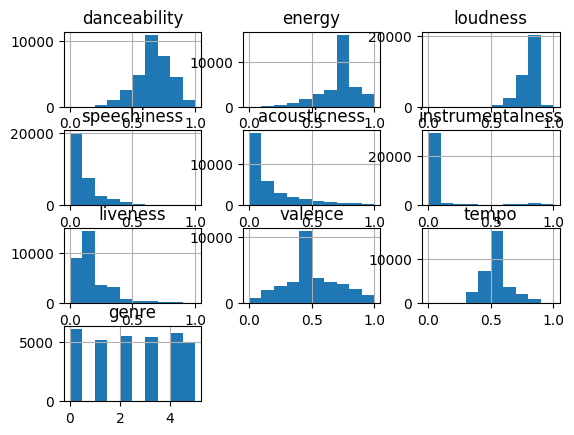

In [72]:
ds_copy.hist()